# Data Cleaning and Exploratory Data Analysis

In this tutorial, we will be cleaning our dataset and performing exploratory data analysis on it. This tutorial is designed for anyone who wants to learn how to clean the dataset and perform exploratory data analysis on it.

To start with, you should have a dataset. There are many sources on the internet where you can download datasets from. In this tutorial, we are using the Airbnb's New York city dataset.

The dataset is taken from Kaggle and the link for it is https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

This is the first step in Data analysis and it is extremely important that we understand what columns our dataset has and how many of them are necessary to reach the goal of the project. This brings us to understnding the problem statement of our project. We are using this dataset to focus on the host's point of view. If you are a host and you have a home in New York City that you wish to rent out to travellers, Airbnb gives you the platform. Our problem statement is to predict the price of a particular home at a specific location in New York City, so that it helps the host in setting a price for his/her home. This will be done taking various factors into consideration.

Let us start with the steps to clean our data and keeping only those columns that are important to us.

#### 1. Importing numpy and pandas library.

In [77]:
import numpy as np
import pandas as pd

#### 2. Reading the csv file

Here, we will first read the csv file and load the dataset. We are also checking for the format of the overall dataset, columns and datatype of each of the columns. The info() method gives us the overall structure of the dataset. It also helps in identifying the columns that contain null objects.

In [78]:
ny = pd.read_csv('MAYA_NYC_2019.csv')
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

Here, we are reading the csv and storing it in the ny variable. In the next line, the ny.info() method prints all the column names along with the number of non null rows in each of them, and the datatype of each column.

#### 3. Finding the number of null values in each column

Now, we have to get rid of null values within our dataset. The isnull() function returns the missing values in each of the columns and the sum() function gives us the sum of null entries in each of the columns. 

In [79]:
ny.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### 4. Analyzing the above result

After finding the number of null values in each of the columns, we see that there are around 10052 rows in last_review and number_of_reviews columns that have null values. We need to check if these null values are in the same rows within the dataset.

Here, we compare both the columns from our dataset to check if the null values lie in the same row for both the columns.

In [80]:
(ny['last_review'].isnull()==ny['reviews_per_month'].isnull()).all()

True

#### 5. Replacing the null values with "unknown"

After finding the columns with null values, we will replace each null with a string, "unknown". Since, we are performing this operation on "reviews_per_month" column and this column being of type float, assigning 0 to nulls may give an incorrect picture while analysing. So, we are replacing it with a string. Let us check the datset after replacing the null values with unknown.

In [81]:
ny.loc[ny['reviews_per_month'].isnull(),'reviews_per_month']="unknown"
ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,unknown,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.1,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.4,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188


#### 6. Describing the dataset

To go ahead with our analysis, let us describe our dataset. The describe() function gives us the max, min, count, etc. for all entries in each of the columns in the dataset. This is an easier method to find vague values in our dataset. For example, the price column has value 0. This is a vague value and we can remove it.

In [82]:
ny.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


#### 7. Removing rows where price is 0

Here, price being 0 is unrealistic. So we will remove the rows where price is 0. FOr this, we have to first check for the number of rows where price is 0. If it is less than 10% of the total rows of our dataset, we can remove them. 

First, let us print all the rows where price is 0.

In [83]:
#printing the rows where price is 0
print(ny[ny['price'] == 0])

             id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25794  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26259  20933849                              the best you can find   13709292   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name neighbo

Printing the number of rows where price is 0. Here, we get the result as 11. So, we can plan to remove those rows.

In [84]:
print(sum(ny['price'] == 0))

11


In [85]:
# Keeping only those rows where price is greater than 0.
ny=ny[ny['price']>0]

Now, we can check if there are any rows with price equal to 0.

In [86]:
ny[ny['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


#### 7. Removing rows where minimum_nights is greater than 365

Here, minimum_nights being greater than 365 is unrealistic. So we will remove the rows where minimum_nights is greater than 365. For this, we have to first check for the number of rows where minimum_nights is greater than 365. If it is less than 10% of the total rows of our dataset, we can remove them. 

First, let us print all the rows where minimum_nights is greater than 365.

In [87]:
#printing the rows where minimum_nights is greater than 365
print(ny[ny['minimum_nights'] > 365])

             id                                 name    host_id   host_name  \
1305     568684  800sqft apartment with huge terrace    2798644  Alessandra   
2854    1615764                                  NaN    6676776       Peter   
5767    4204302     Prime W. Village location 1 bdrm   17550546   Genevieve   
7355    5431845  Beautiful Fully Furnished 1 bed/bth    3680008       Aliya   
8014    6169897            Wonderful Large 1 bedroom   10720264        John   
10829   8341919  Brand New Luxury Apt Lease Takeover   43945071     Shining   
11193   8668115   Zen Room in Crown Heights Brooklyn    8996336       Laura   
13404  10053943   Historic Designer 2 Bed. Apartment    2697686    Glenn H.   
14285  11096888      Peaceful apartment close to F/G    2228137      Amanda   
15946  12888849   Bright Luxury Studio, Central Loc.   16476167       Sarah   
26341  20990053      Beautiful place in Brooklyn! #2  151084261       Angie   
34487  27362309                        Not available

Printing the number of rows where minimum_nights is greater than 365. Here, we get the result as 14. So, we can plan to remove these rows.

In [88]:
print(sum(ny['minimum_nights'] > 365))

14


In [89]:
# Keeping only those rows where minimum_nights is less than 365.
ny=ny[ny['minimum_nights']<365]

Now, we can check if there are any rows with minimum_nights less than 365.

In [90]:
ny[ny['minimum_nights'] > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


#### 8. Final data cleaning

We are resetting the index of our dataset here. Next, we can remove columns that are not important for our analysis. We use the reset_index() function to reset the index and drop() function to remove specific columns from our dataset.

In [91]:
ny.reset_index(drop=True,inplace=True)

In [ ]:
ny.drop(['name','host_name','last_review','id',], axis=1, inplace=True)

Using the info() fuction to take a final look at our dataset. Here, we get the same number of non-null rows for each of the columns.

In [94]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 12 columns):
host_id                           48841 non-null int64
neighbourhood_group               48841 non-null object
neighbourhood                     48841 non-null object
latitude                          48841 non-null float64
longitude                         48841 non-null float64
room_type                         48841 non-null object
price                             48841 non-null int64
minimum_nights                    48841 non-null int64
number_of_reviews                 48841 non-null int64
reviews_per_month                 48841 non-null object
calculated_host_listings_count    48841 non-null int64
availability_365                  48841 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 4.5+ MB


#### 9. Visualizing the dataset

We can plot the columns of our dataset to visualize and make conclusions from our dataset. 

The following bar graph shows the number of homes in the neighbourhood groups of New York City.

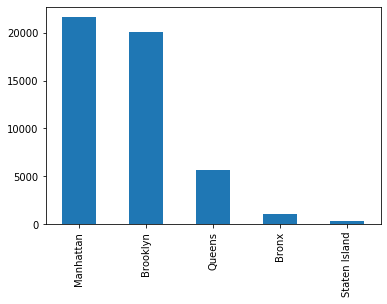

In [99]:
ny['neighbourhood_group'].value_counts().plot(kind='bar')

The following bar graph shows the number of room types within different Airbnb homes of New York City.

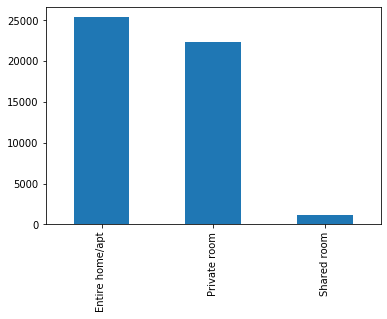

In [96]:
ny['room_type'].value_counts().plot(kind='bar')

The following bar graph shows the plot of prices according to the neighbourhood groups of New York City.

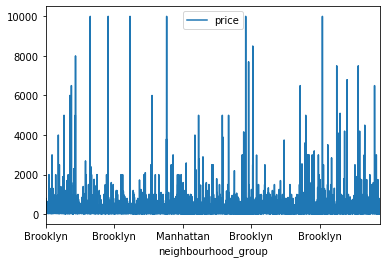

In [43]:
ny.plot('neighbourhood_group','price')

#### 10. Citations

1. https://www.tutorialspoint.com/matplotlib/index.htm
2. https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data